In [16]:
from Methods.Adams import adams
from Methods.Euler import euler
from Methods.AdamsBashfortMoulton import abm
from Methods.PredictorCorrector import predictor_corrector as pred_corr
from Methods.RungeKutt import rk_a,rk_b
import numpy as np

In [17]:
def fi(x):
    return np.sin(np.exp(x))


def dfi(x):
    return np.exp(x) * np.cos(np.exp(x))


def f(x, y):
    return dfi(x) + k * (y - fi(x))

In [35]:
N = 2 ** 2
_N = 2 ** 6

draw_step = max(1,int(N/_N))


k = 0
x0 = -1
xN = 2

nodes = np.linspace(x0, xN, N)
y_fi = fi(nodes)

y_euler = euler(nodes, fi(x0),f)
y_adams = adams(nodes,y_fi[:4],f)
y_pc = pred_corr(nodes,fi(x0),0.01,f)
y_abm = abm(nodes,y_fi[:4],f)
y_rka = rk_a(nodes, fi(x0),f)
y_rkb = rk_b(nodes, fi(x0),f)

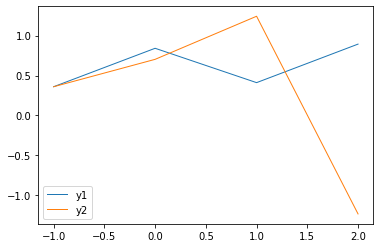

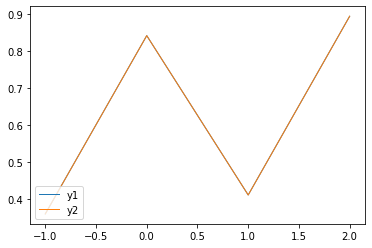

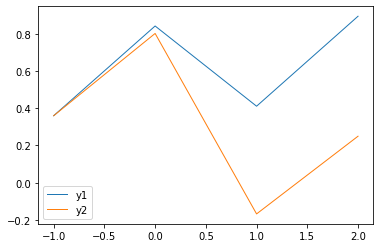

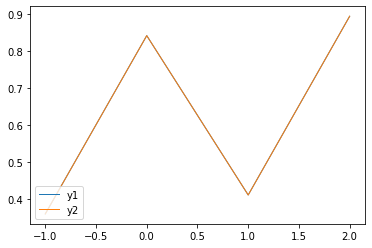

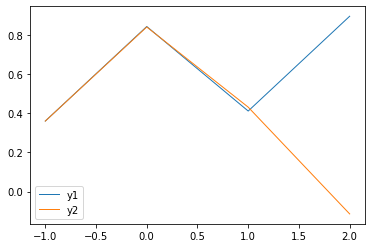

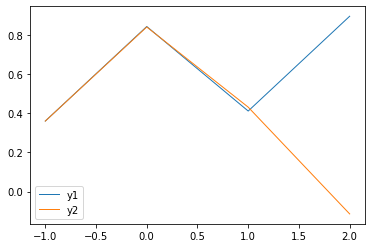

In [36]:
from matplotlib import pyplot as plt

def compare(nodes,y1,y2):
    fig = plt.figure()
    plt.plot(nodes, y1, label='y1', linewidth=1)
    plt.plot(nodes, y2, label='y2', linewidth=1)
    plt.legend(loc='lower left')
    plt.show()

nodes_draw = nodes[::draw_step]
y_fi_draw = y_fi[::draw_step]
compare(nodes_draw,y_fi_draw,y_euler[::draw_step])
compare(nodes_draw,y_fi_draw,y_adams[::draw_step])
compare(nodes_draw,y_fi_draw,y_pc[::draw_step])
compare(nodes_draw,y_fi_draw,y_abm[::draw_step])
compare(nodes_draw,y_fi_draw,y_rka[::draw_step])
compare(nodes_draw,y_fi_draw,y_rkb[::draw_step])
